# 인공신경망 손글씩 인식

In [23]:
# 필요한 패키지 가져오기

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
# 하이퍼 파라미터 설정

batch_size = 128
num_classes = 10
epochs = 10

In [3]:
# 데이터 가져오기

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0]

5

In [8]:
import numpy as np
np.min(x_train)

0

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
x_train[0].dtype

dtype('uint8')

In [13]:
# 데이터 전처리

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [14]:
x_train.shape

(60000, 784)

In [15]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
# 목표 변수 전처리 - one-hot 인코딩

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [18]:
y_train.shape

(60000, 10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_test.shape

(10000, 10)

In [21]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [24]:
# 모형 구조 정의하기

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# 학습 정의하기

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [26]:
# 학습하기

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 0.2927 - accuracy: 0.9125 - val_loss: 0.1331 - val_accuracy: 0.9592
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.1137 - accuracy: 0.9645 - val_loss: 0.1009 - val_accuracy: 0.9704
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0780 - accuracy: 0.9753 - val_loss: 0.0957 - val_accuracy: 0.9734
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0596 - accuracy: 0.9809 - val_loss: 0.0999 - val_accuracy: 0.9715
Epoch 5/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0929 - val_accuracy: 0.9742
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0403 - accuracy: 0.9864 - val_loss: 0.0963 - val_accuracy: 0.9738
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0935 - val_accuracy: 0.9751
Epoch 

In [25]:
# 성능 평가하기

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0731312558054924
Test accuracy: 0.9787999987602234


In [26]:
score

[0.0731312558054924, 0.9787999987602234]

In [27]:
history.history['val_loss']

[0.14717362821102142,
 0.10522938519716263,
 0.09548335522413254,
 0.09239569306373596,
 0.09568732976913452,
 0.08858814835548401,
 0.0996193066239357,
 0.08356088399887085,
 0.09917481243610382,
 0.0899805948138237]

In [28]:
#성능 그래프로 그리기

# graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

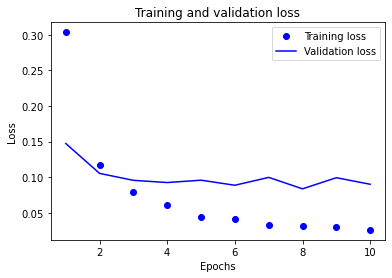

<Figure size 432x288 with 0 Axes>

In [29]:
epoch_range = range(1, len(acc) + 1)
epoch_range
plt.plot(epoch_range, loss, 'bo', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

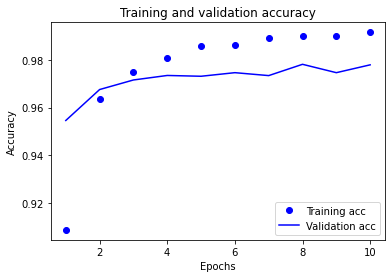

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(epoch_range, acc, 'bo', label='Training acc')
plt.plot(epoch_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()